Neural network for prediction 
--------

Based on these [notebooks](https://github.com/stephencwelch/Neural-Networks-Demystified)

By The End Of This Session You Should Be Able To:
----

- Fit data with a perceptron model
- Remember the power of matrix algebra and calculus 
- Explain the fundamentals of gradient descent

The general workflow for deep learning
------

1. Define a (single) architecture from input to output
2. Initialize weights (from elsewhere if possible)
3. Get (a ton of) data
4. Train with Stochastic gradient descent (SGD)

The workflow for today
-----

1. Define a simple architecture
2. Initialize network weights to random variables
3. Use toy data
4. Train with gradient descent

------

We predict some output value y, given some input value X.

For example, you want to predict your score on a test based on how many hours you sleep and how many hours you study the night before. 

First need some data. Let’s say for the last three tests, you recorded your number of hours of studying, your number of hours sleeping, and your score on the test.

In [4]:
reset -fs

In [5]:
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# X = (hours sleeping, hours studying)
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [7]:
# y = Score on test
y = np.array(([75], [82], [93]), dtype=float)
y

array([[ 75.],
       [ 82.],
       [ 93.]])

Now that we have some data, we’re going to use it to train a model to predict how you will do on your next test, based on how many hours you sleep and how many hours you study.

This is a supervised regression problem. It’s supervised because our examples have inputs and outputs. It’s a regression problem because we’re predicting your test score, which is a continuous output.

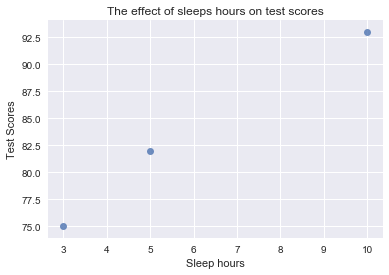

In [8]:
sns.regplot(x=X[:,0],
           y=y,
           fit_reg=False);
plt.title("The effect of sleeps hours on test scores");
plt.xlabel('Sleep hours');
plt.ylabel('Test Scores');

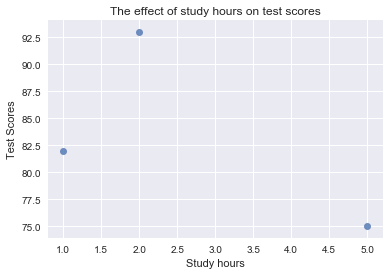

In [9]:
sns.regplot(x=X[:,1],
           y=y,
           fit_reg=False);
plt.title("The effect of study hours on test scores");
plt.xlabel('Study hours');
plt.ylabel('Test Scores');

------
Normalization
------

Before we throw our data into the model, we need to account for the differences in the units of our data. Both of our inputs are in hours, but our output is a test score, scaled between 0 and 100. 

Neural networks are smart, but not smart enough to guess the units of our data. 

It’s kind of like asking our model to compare apples to oranges, where most learning models really only want to compare apples to apples. The solution is to scale our data, this way our model only sees standardized units. 

Here, we're going to take advantage of the fact that all of our data is positive, and simply divide by the maximum value for each variable, effectively scaling the result between 0 and 1. 

In [10]:
# Normalize data to help learning rate
X = X/np.amax(X, axis=0)
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [11]:
y = y/100 # Max test score is 100
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

----
Define architecture
------

Now we can build our Neural Network. We know our network must have 2 inputs and 1 output, because these are the dimensions of our data. 

Here, we’re going to use 1 hidden layer with 3 hidden units.

If we wanted to build a deep neural network, we would just stack a bunch of layers together.

![](images/simpleNetwork.png)

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row is an example| (numExamples, input_layer_size)|
|y |$$y$$|target data|(numExamples, output_layer_size)|

-----
Parameters & hyperparameters
----

Our neural network's parameters are the weights between the nodes.

Our network's hyperparameters are the 2 inputs, 3 hidden units, and 1 output. 

Today, we'll learn just the parameters. Later we'll also learn the hyperparameters.

-----
Forward Pass
------

We’ll take care of moving data through our network in a method called forward. Rather than pass inputs through the network one at a time, we’re going to use matrices to pass through multiple inputs at once. 

Our input data matrix, X, is of dimension 3 by 2, because we have 3, 2-dimensional examples. 

In [12]:
print(X.shape)

(3, 2)


Our corresponding output data, y, is of dimension 3 by 1.

In [13]:
print(y.shape)

(3, 1)


In [14]:
class NeuralNetwork:
    "Simple neural network"
    
    def __init__(self):   
        # Network architecture      
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1

In [15]:
# Instantiate neural network
nn = NeuralNetwork()

In [16]:
# List attributes
print(*(i for i in dir(nn) if not i.startswith('__')), sep="\n")

hidden_layer_size
input_layer_size
output_layer_size


Each input value, or element in matrix X, needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron. 

This is a complex operation, but if we take the three outputs we're looking for as a single row of a matrix, and place all our individual weights into a matrix of weights, we can create the exact behavior we need by multiplying our input data matrix by our weight matrix. 

Using matrix multiplication allows us to pass multiple inputs through at once by simply adding rows to the matrix X. 

From here on out, we'll refer to these matrices as X, W one, and z two, where z two the activity of our second layer. 

Notice that each entry in z is a sum of weighted inputs to each hidden neuron. Z is of size 3 by 3, one row for each example, and one column for each hidden unit. 

Matrix notation is really nice here, because it allows us to express the complex underlying process in a single line!

$$
z^{(2)} = XW^{(1)} \tag{1}\\
$$

---
Activation Function
-----

Now that we have the activities for our second layer, z two, we need to apply the activation function. 

We'll independently apply the function to each entry in matrix z using a python method for this called sigmoid, because we’re using a sigmoid as our activation function. 

In [17]:
def sigmoid(z):
    "Define sigmoid activation function to scalar, vector, or matrix"
    return 1/(1+np.exp(-z))

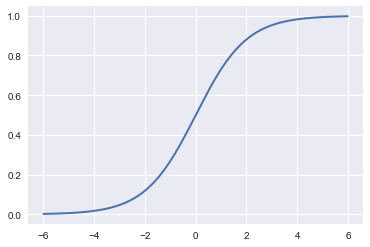

In [18]:
domain = np.arange(-6, 6, 0.01)
plot(domain, sigmoid(domain), linewidth=2);
grid(1);

Using Numpy is really nice here, because we can pass in a scalar, vector, or matrix. Numpy will apply the activation function element-wise, and return a result of the same dimension as it was given.

In [19]:
# Scalar
f"{sigmoid(1):.2}"

'0.73'

In [20]:
# Vector
sigmoid(np.array([-1,0,1]))

array([ 0.26894142,  0.5       ,  0.73105858])

In [21]:
# Matrix
sigmoid(np.random.randn(3,3))

array([[ 0.20797444,  0.82291433,  0.80953183],
       [ 0.83659453,  0.73111157,  0.53890918],
       [ 0.19670385,  0.88934027,  0.25763333]])

-----
Forward propagation
----

Formula for forward propagation, using f to denote our activation function.

We can write that a two, our second layer activity, is equal to f of z two. Two will be a matrix of the same size as z two, 3 by 3.

$$
a^{(2)} = f(z^{(2)}) \tag{2}\\
$$

To finish forward propagation we need to propagate a two all the way to the output, yhat. We've already done the heavy lifting in the previous layer, so all we have to do now is multiply a two by our second layer weights W2 and apply one more activation function. W2 will be of size 3x1, one weight for each synapse. Multiplying a2, a 3 by 3, by W2, a 3 by 1 results in a 3 by 1 matrix z three, the activity or our third layer. z3 has three activity values, one for each example. Last but not least, we'll apply our activation function to z three yielding our official estimate of your test score, yHat.  

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$
$$
\hat{y} = f(z^{(3)}) \tag{4}\\
$$

We need to implement our forward propagation formulas in Python. First we'll initialize our weight matrices in our init method. For starting values, we'll use random numbers. 

In [22]:
class NeuralNetwork:
    "Simple neural network"
    
    def __init__(self):  
        # Network architecture      
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1
        
        # Weights 
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        
    def forward(self, X):
        "Propagate inputs though network"
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat

    @staticmethod
    def sigmoid(z):
        "Define sigmoid activation function to scalar, vector, or matrix"
        return 1/(1+np.exp(-z))

In [23]:
# Instantiate neural network
nn = NeuralNetwork()

# List attributes
print(*(i for i in dir(nn) if not i.startswith('__')), sep="\n")

W1
W2
forward
hidden_layer_size
input_layer_size
output_layer_size
sigmoid


And there you have it, a Python class capable of estimating your test score given how many hours you sleep and how many hours you study. 

We can pass in our input data and get real outputs. 

-----

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, input_layer_size)|
|y |$$y$$|target data|(numExamples, output_layer_size)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (input_layer_size, hidden_layer_size) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hidden_layer_size, output_layer_size) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hidden_layer_size) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hidden_layer_size) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, output_layer_size) |

Now, you may guess that our estimates are quite terrible. That's because we have not yet trained our network...

In [24]:
y_hat = NeuralNetwork().forward(X)

In [25]:
from pandas import DataFrame

In [26]:
DataFrame({'y predicted': y_hat.flatten().tolist(),
           'y observed': y.flatten().tolist()})

,y observed,y predicted
0,0.75,0.481179
1,0.82,0.564161
2,0.93,0.590936


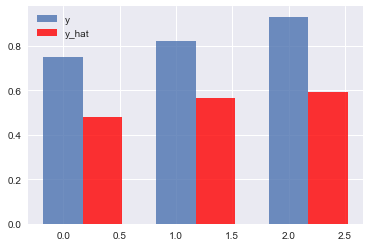

In [27]:
# Compare estimate, y_hat, to actually score
bar([0,1,2], y, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],y_hat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'y_hat']);

Right now our predictions are pretty inaccurate. To improve our model, we first need to quantify exactly how wrong our predictions are. We'll do this with a cost function. A cost function allows us to express exactly how wrong or "costly" our models is, given our examples.

---
Loss & Cost Function
----

When someone says they’re training a network, what they really mean is that they're minimizing a cost function. 

One way to compute an overall cost is to take each error value, square it, and add these values together. Now that we have a cost, or job is to minimize it.

$$
J = \sum \frac{1}{2}(y-\hat{y})^2 \tag{5}
$$

The cost is a function of two things,

1. The data
2. The weights 

We don't have much control of our data, so we'll minimize our cost by changing the weights.

Conceptually, this is pretty simple concept. We have a collection of 9 individual weights, and we're saying that there is some combination of w's that will make our cost, J, as small as possible. 

In [28]:
class NeuralNetwork:
    "Simple neural network"
    
    def __init__(self):  
        # Network architecture      
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1
       
        # Weights 
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        
    def cost_function(self, X, y):
        "Compute cost for given X,y, use weights already stored in class."
        self.y_hat = self.forward(X)
        J = 0.5*sum((y-self.y_hat)**2)
        return J
    
    def forward(self, X):
        "Propagate inputs though network"
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat

    @staticmethod
    def sigmoid(z):
        "Define sigmoid activation function to scalar, vector, or matrix"
        return 1/(1+np.exp(-z))

In [29]:
nn = NeuralNetwork()
cost = nn.cost_function(X, y)
f"{cost:.2}"

'0.5'

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, input_layer_size)|
|y |$$y$$|target data|(numExamples, output_layer_size)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (input_layer_size, hidden_layer_size) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hidden_layer_size, output_layer_size) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hidden_layer_size) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hidden_layer_size) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, output_layer_size) |
|J | $$J$$ | Cost | (1, output_layer_size) |

We have 5 equations, but we can really think of them as one big equation.


And since we have one big equation that uniquely determines our cost, J, from X, y, W1, and W2, we can use our good friend calculus to find what we're looking for. We want to know "which way is downhill", that is, what is the rate of change of J with respect to W, also known as the derivative. And in this case, since we’re just considering one weight at a time, the partial derivative. 

We can derive an expression for dJdW, that will give us the rate of change of J with respect to W, for any value of W! If dJdW is positive, then the cost function is going uphill. If dJdW is negative the cost function is going downhill. 

Now we can really speed things up. Since we know in which direction the cost decreases, we can save all that time we would have spent searching in the wrong direction. We can save even more computational time by iteratively taking steps downhill and stopping when the cost stops getting smaller. 

This method is known as __gradient descent__, and although it may not seem so impressive in one dimension, it is capable of incredible speedups in higher dimensions. Gradient descent allows us to find needles in very very very large haystacks. 

Gradient Descent Demo
-----

http://www.onmyphd.com/?p=gradient.descent

Now before we celebrate too much here, there is a restriction. What if our cost function doesn't always go in the same direction? What if it goes up, then back down? The mathematical name for this is non-convex, and it could really throw off our gradient descent algorithm by getting it stuck in a local minima instead of our ideal global minima. One of the reasons we chose our cost function to be the sum of squared errors was to exploit the convex nature of quadratic equations.

We know that the graph of y equals x squared is a nice convex parabola and it turns out that higher dimensional versions are too!

In [30]:
class NeuralNetwork:
    "Simple neural network"
    
    def __init__(self):  
        # Network architecture      
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1
        
        # Weights 
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        
    def cost_function(self, X, y):
        "Compute cost for given X,y, use weights already stored in class."
        self.y_hat = self.forward(X)
        J = 0.5*sum((y-self.y_hat)**2)
        return J
    
    def cost_function_prime(self, X, y):
        "Compute derivative with respect to W and W2 for a given X and y:"
        self.y_hat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.y_hat), self.sigmoid_prime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoid_prime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    def forward(self, X):
        "Propagate inputs though network"
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat

    @staticmethod
    def sigmoid(z):
        "Define sigmoid activation function to scalar, vector, or matrix"
        return 1/(1+np.exp(-z)) 

    def sigmoid_prime(self,z):
        "Gradient of sigmoid"
        return np.exp(-z)/((1+np.exp(-z))**2)

In [31]:
dJdW1, dJdW2 = NeuralNetwork().cost_function_prime(X,y)

In [32]:
dJdW1

array([[ 0.02417986,  0.01554671,  0.0016959 ],
       [ 0.01709165,  0.01162738,  0.00090634]])

In [33]:
dJdW2

array([[-0.10809892],
       [-0.11285035],
       [-0.07749096]])

If we move this way by adding a scalar times our derivative to our weights, our cost will increase, 

In [67]:
step_size = 3
nn.W1 = nn.W1 + step_size*dJdW1
nn.W2 = nn.W2 + step_size*dJdW2
cost2 = nn.cost_function(X, y)
f"{cost2[0]:.2}"

'0.21'

If we do the opposite, subtract our gradient from our weights, we will move downhill and reduce our cost. 

This simple step downhill is the core of gradient descent and a key part of how even very sophisticated learning algorithms are trained. 

In [63]:
step_size = -3
nn.W1 = nn.W1 + step_size*dJdW1
nn.W2 = nn.W2 + step_size*dJdW2
cost2 = nn.cost_function(X, y)
f"{cost2[0]:.2}"

'3.1e-09'

All done with our NeuralNetwork!

Let's write it to a file for later use

In [36]:
%%writefile neural_network.py

import numpy as np

class NeuralNetwork:
    "Simple neural network"
    
    def __init__(self):  
        # Network architecture      
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1
        
        # Weights 
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
        
    def cost_function(self, X, y):
        "Compute cost for given X,y, use weights already stored in class."
        self.y_hat = self.forward(X)
        J = 0.5*sum((y-self.y_hat)**2)
        return J
    
    def cost_function_prime(self, X, y):
        "Compute derivative with respect to W and W2 for a given X and y:"
        self.y_hat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.y_hat), self.sigmoid_prime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoid_prime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    def forward(self, X):
        "Propagate inputs though network"
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat

    @staticmethod
    def sigmoid(z):
        "Define sigmoid activation function to scalar, vector, or matrix"
        return 1/(1+np.exp(-z)) 

    def sigmoid_prime(self,z):
        "Gradient of sigmoid"
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    #####################################################
    # Helper Functions
    def get_params(self):
        "Transform W1 and W2 unrolled into vector"
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def set_params(self, params):
        "Set W1 and W2 using single paramater vector."
        W1_start = 0
        W1_end = self.hidden_layer_size * self.input_layer_size
        self.W1 = np.reshape(params[W1_start:W1_end], (self.input_layer_size , self.hidden_layer_size))
        W2_end = W1_end + self.hidden_layer_size*self.output_layer_size
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hidden_layer_size, self.output_layer_size))
        
    def compute_gradients(self, X, y):
        dJdW1, dJdW2 = self.cost_function_prime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        

Overwriting neural_network.py


-----
Training
-----

We need to train our model. We'll talk more about training tomorrow.

For today, I wrote a training class to help us.

In [37]:
%%writefile -a neural_network.py

from scipy import optimize

class Trainer:

    def __init__(self, N):
        "Make Local reference to network"
        self.N = N
        
    def callbackF(self, params):
        self.N.set_params(params)
        self.J.append(self.N.cost_function(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.set_params(params)
        cost = self.N.cost_function(X, y)
        grad = self.N.compute_gradients(X,y)
        
        return cost, grad
        
    def train(self, X, y, maxiter=50):

        self.X = X
        self.y = y
        self.J = [] # Empty list to store costs
        
        params0 = self.N.get_params() # Intial parameters at epoch 0

        options = {'maxiter': maxiter, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper,
                                 params0,
                                 jac=True,
                                 method='BFGS',
                                 args=(X, y), 
                                 options=options,
                                 callback=self.callbackF)
        self.N.set_params(_res.x)
        self.optimizationResults = _res

Appending to neural_network.py


In [38]:
from neural_network import *

In [54]:
nn = NeuralNetwork()
t = Trainer(nn)
t.train(X, y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 39
         Gradient evaluations: 39


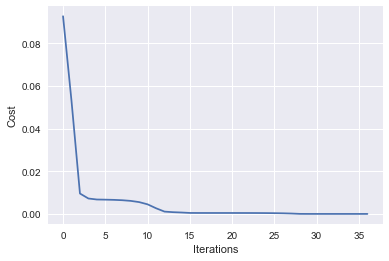

In [55]:
plot(t.J)
grid(1)
xlabel('Iterations')
ylabel('Cost');

In [41]:
DataFrame({'y predicted': t.N.y_hat.flatten().tolist(),
           'y observed': y.flatten().tolist()})

,y observed,y predicted
0,0.75,0.750012
1,0.82,0.819989
2,0.93,0.930096


In [58]:
nn.a2

array([[ 0.76801754,  0.39420792,  0.36469724],
       [ 0.78783001,  0.42680738,  0.25072001],
       [ 0.932377  ,  0.35668578,  0.10069267]])

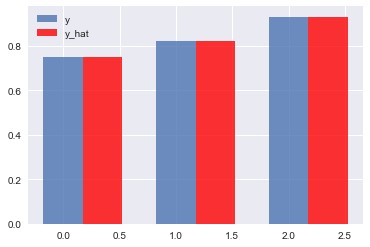

In [42]:
# Compare estimate, y_hat, to actually score
bar([0,1,2], y, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35], t.N.y_hat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'y_hat']);

-----
Overfitting like a champ!
-----

![](http://www.cpmfitness.com/wp-content/uploads/2015/01/bigguysmallshirt.jpg)

----
What if train just for a little bit…
----

In [48]:
nn = NeuralNetwork()
t = Trainer(nn)
t.train(X, y, maxiter=3)

DataFrame({'y predicted': t.N.y_hat.flatten().tolist(),
           'y observed': y.flatten().tolist()})

         Current function value: 0.003497
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6


,y observed,y predicted
0,0.75,0.787100
1,0.82,0.870922
2,0.93,0.875012


Summary
------

- Matrix algebra and calculus are your real life friends
- Gradient descent "walks downhill" to find the global minimum of the cost function
- NN are very powerful and will overfit if you let them

<br>
<br> 
<br>

----